Here we will unload data from the https://www.work.ua/jobs-kyiv-data+analyst/ which will contain job title and hiring company.

In order to get all the data on request from this site, we will have to upload data from several pages.

We will use:
• Pandas for data manipulating.
• The Requests library for making HTTP requests in Python. It abstracts the complexities of making requests behind a beautiful, simple API so that you can focus on interacting with services and consuming data in your application.
• The Beautiful Soup package is used to extract data from html files.
• Numpy for multidimensional arrays.
• Time for The sleep() function which will control the loop’s rate by pausing the execution of the loop for a specified amount of time.
• Random for The randint(2,10) function which will vary the amount of waiting time between requests for a number between 2-10 seconds.

In [ ]:
import requests
from requests import get
from bs4 import BeautifulSoup
import numpy as np

from time import sleep
from random import randint

Let’s go to the URL of the page we're scraping.
Now, let’s click on the next page and see what page 1'st URL looks like:

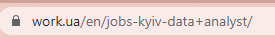


And then page 3's URL:

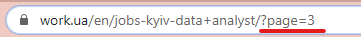

We notice ?page=3 is added into the URL when we go to page 3.

Why is this important? This information will help us tell our loop how to go to the next page to scrape.

Each page’s URL follows a certain logic as the web pages change. To make the URL requests we’d have to vary the value of the page parameter, like this:

In [ ]:
titles =[]
companies =[]
pages = np.arange(1, 8,1)

<mark>Pages</mark> is the variable we create to store our page-parameter function for our loop to iterate through
<mark>np.arrange(1,8,1)</mark> is a function in the NumPy Python library, and it takes four arguments — but we’re only using the first three which are: <mark>start</mark>, <mark>stop</mark>, and <mark>step</mark>. step is the number that defines the spacing between each. So: Start at 1, stop at 8, and step by 1.

Inside this new loop is where we’ll request our new URLs, add our html_soup (helps us parse the HTML files).

In [142]:
# Looping Through Each Page:

for page in pages:
    page = requests.get("https://www.work.ua/jobs-kyiv-data+analyst/?page=" + str(page))
    soup = BeautifulSoup(page.text, 'html.parser')
    job_h2 = soup.find_all('h2')
    company = soup.find_all('div', class_="add-top-xs")
    
    #The sleep() function which will control the loop’s rate by pausing the execution of the loop for a specified amount of time.
    
    #The randint(2,10) function will vary the amount of waiting time between requests for a number between 2-10 seconds.
    #You can change these parameters to any that you like.
    
    sleep(randint(2,10))
    
    for link1 in job_h2:
        name1 = link1.get_text()
        print(link1.get_text())
        titles.append(name1)
        
    for link2 in company:
        name2 = link2.get_text()
        print(link2.get_text())
        companies.append(name2)
        
    


BI, Data Analyst


Data Analyst


MS SQL DBA


Oracle DBA, Database Administrator


Аналитик баз данных


Data Analyst (BI/Reporting)


Java, JavaScript developer, Data Analyst


Data Scientist


Data analyst


Аналітик консолідованої інформації


Аналітик бази даних


Data Analyst в рекламную сеть


Администратор баз данних MS SQL


Data scientist

Сподобалися результати пошуку?

Blackstone System limited · Київ · 1,5 км від центру

OLX  · Київ · 3,8 км від центру

Укрпошта  · VIP · Київ · 0,1 км від центру

Dukascopy Bank SA  · Київ 

Замогильна А.В., ФОП  · Київ 

Добробут, ММ  · VIP · Київ 

IGM · Київ 

Vodafone Україна  · VIP · Київ 

Vodafone Україна  · VIP · Київ · 2,9 км від центру

Фокстрот  · VIP · Київ · 4,9 км від центру

Юрія-Фарм, ТОВ  · VIP · Київ · 6,4 км від центру

Эдпартнер  · Київ · 2,5 км від центру

Діла, медична лабораторія  · VIP · Київ · 2 км від центру

ПриватБанк  · VIP · Київ 

Data Scientist​


Data Scientist


Data analyst


Data scientist


Аналитик кон

Here we clean our lists items:

In [171]:
titles = list(map(str.strip,titles))
companies = list(map(str.strip,companies))
titles =list(filter(lambda a: a != 'Сподобалися результати пошуку?', titles))
titles[0:10]

['BI, Data Analyst',
 'Data Analyst',
 'MS SQL DBA',
 'Oracle DBA, Database Administrator',
 'Аналитик баз данных',
 'Data Analyst (BI/Reporting)',
 'Java, JavaScript developer, Data Analyst',
 'Data Scientist',
 'Data analyst',
 'Аналітик консолідованої інформації']

Create dataframe and save it as csv file.

In [170]:
df = pd.DataFrame({'Job Title':titles,'Companies':companies})
df.to_csv(r'C:\Users\jobs.csv', encoding='utf-16')

In [168]:
df

,Job Title,Companies
0,"BI, Data Analyst","Blackstone System limited · Київ · 1,5 км від ..."
1,Data Analyst,"OLX · Київ · 3,8 км від центру"
2,MS SQL DBA,"Укрпошта · VIP · Київ · 0,1 км від центру"
3,"Oracle DBA, Database Administrator",Dukascopy Bank SA · Київ
4,Аналитик баз данных,"Замогильна А.В., ФОП · Київ"
...,...,...
76,Аналитик консолидированной информации,Sapiens · Київ
77,Data scientist,"Fozzy Group Логістика · VIP · Київ · 5,5 км в..."
78,"Администратор отдела сбора и анализа данных, а...",Visotsky Consulting CIS · Київ
79,Senior Data Scientist (NLP),Turnitin · Київ
